## Image Resize

In [6]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "../../datasets/train/cass/*"
path = os.path.dirname(os.path.abspath(path)) +'/'
dirs = os.listdir( path )
print(path)

C:\Users\JeanMichel\Desktop\Github_repositories\BARS\datasets\train\cass/


In [20]:
for item in dirs :
    if ('png' in item )& True:
        print(item)

cass (1).png
cass (100).png
cass (101).png
cass (107).png
cass (114).png
cass (115).png
cass (116).png
cass (122).png
cass (123).png
cass (124).png
cass (127).png
cass (128).png
cass (129).png
cass (130).png
cass (131).png
cass (132).png
cass (133).png
cass (134).png
cass (135).png
cass (136).png
cass (142).png
cass (148).png
cass (154).png
cass (155).png
cass (161).png
cass (162).png
cass (163).png
cass (164).png
cass (165).png
cass (166).png
cass (17).png
cass (171).png
cass (172).png
cass (173).png
cass (183).png
cass (184).png
cass (185).png
cass (186).png
cass (187).png
cass (188).png
cass (189).png
cass (193).png
cass (194).png
cass (199).png
cass (2).png
cass (200).png
cass (205).png
cass (209).png
cass (213).png
cass (214).png
cass (215).png
cass (219).png
cass (220).png
cass (221).png
cass (222).png
cass (223).png
cass (224).png
cass (230).png
cass (231).png
cass (235).png
cass (236).png
cass (237).png
cass (238).png
cass (239).png
cass (24).png
cass (240).png
cass (241).png
c

In [23]:
def resize():
    for item in dirs:
        if  (os.path.isfile(path+item)) & ('png' in item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((250,250), Image.ANTIALIAS)
            imResize.save(path + item , 'JPEG', quality=90)
            
resize()

## Package Import & Image Loading

In [24]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
fps = glob.glob(path+'*.png')
images = np.array(
    [cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB) for fp in fps], 
    dtype = np.uint8
)
print(np.shape(images))

(329, 250, 250, 3)


## Define Augmenter 

### case 1 ) Crop, Flip, GaussianBlur

In [25]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

images_aug = seq(images=images)
print(images_aug.shape)

(329, 250, 250, 3)


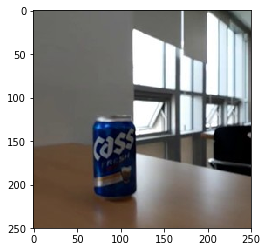

In [26]:
plt.imshow(images[0])

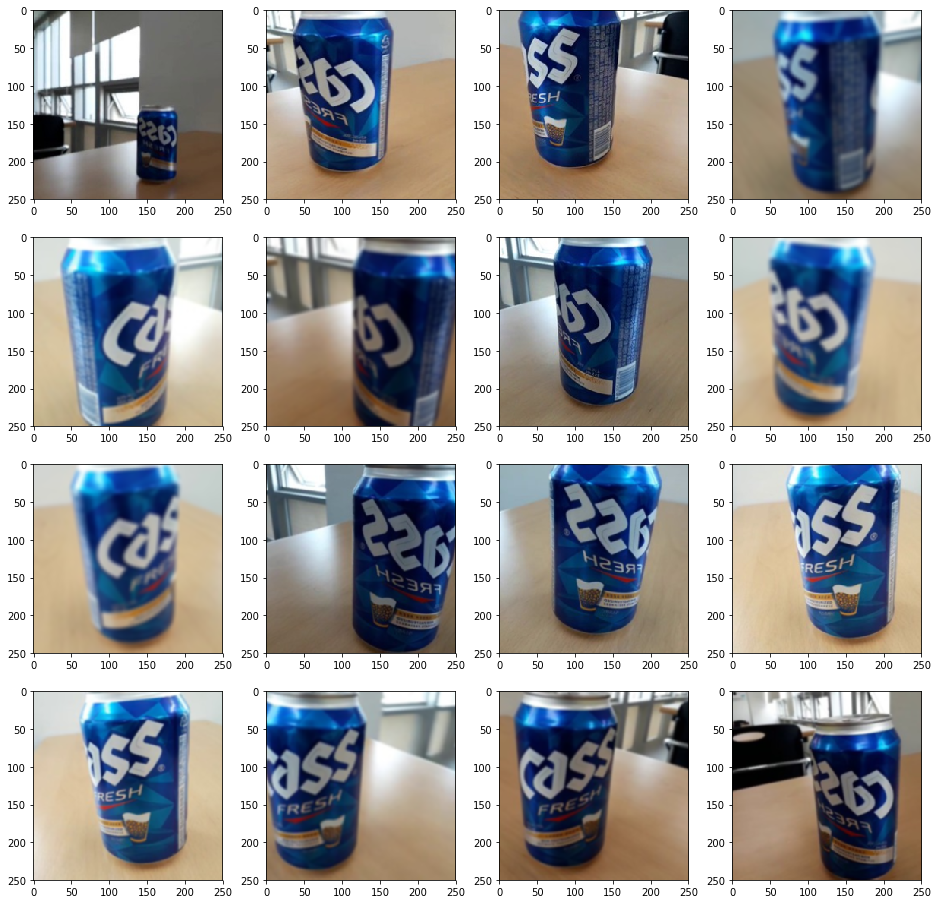

In [27]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [28]:
from PIL import Image
import os, sys

path_aug = path+"softAug"
def saveSaugImages(path_aug):
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path_aug , 'sauged_'+ os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i += 1

saveSaugImages(path_aug)

### case 2) Flip, Crop, GaussianBlur, Contrast, Gaussian noise, Ligteness, Affine ( rigbody transform + shear )

In [29]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    iaa.Sometimes(0.5, # gaussian blur with random sigma 0~0.5 in half of images
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.ContrastNormalization((0.75, 1.5)),# Strengthen or weaken the contrast in each image.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),    # Add gaussian noise.
    iaa.Multiply((0.8, 1.2), per_channel=0.2), # configure lighteness
    iaa.Affine(    # Affine Transform : Scale/zoom them, translate/move them, rotate them and shear them.
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)

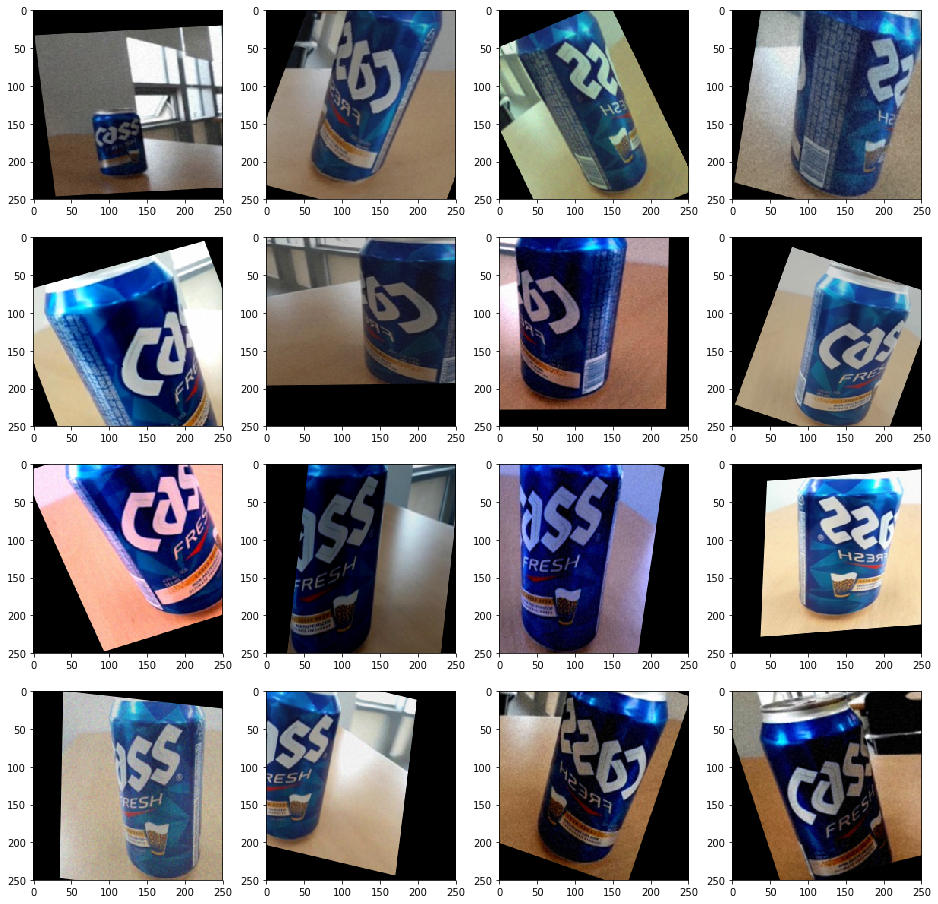

In [30]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [31]:
from PIL import Image
import os, sys

path_aug = path+"hardAug"
def saveHaugImages(path_aug):
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path_aug, 'hauged_'+os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i += 1

saveHaugImages(path_aug)